# Procesamiento Digital de Señales <img src="./logo_UTN.svg" align="right" width="150"/>
## Alumno: Emanuel Olay
### Tarea Semanal: 8
### Consigna:
En esta tarea continuaremos con el capítulo 14 de Holton. DSP Principles and App. y el 8 de Hayes.

Para ello, realizaremos el punto 4 del TP3.

4) Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

Para una señal x(k)=a1⋅sen(Ω1⋅k)+n(k)

siendo 

Ω1=Ω0+fr⋅2πN


Ω0=π2


y las variables aleatorias definidas por

fr∼U(−12,12)


n∼N(0,σ2)


Evalúe el siguiente estimador de Ω1

Ω^W1=arg maxf{PW^}


basado en el periodograma de Welch evaluado en el TP3. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de Ω1

Ω^X1=arg maxf{PX^}


Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del piso de ruido impuesto por n(k).

Ayuda: Puede utilizar el módulo de análisis espectral Spectrum donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

Bonus
Implementar el periodograma de Welch


In [29]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, fftshift
import matplotlib.patches as mpatches
from pandas import DataFrame
from IPython.display import HTML

#######################################################################################################################
#%% Trato de definir para calculo de periodograma de blackman y tuckey
#######################################################################################################################
import spectrum
from spectrum.datasets import marple_data
from pylab import legend, ylim
norm = True
sides = 'centerdc'

In [30]:
#######################################################################################################################
#%% Inicio de la simulación
#######################################################################################################################
plt.close('all')

# Datos generales de la simulación
fs = 1000 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras

figura=0
 
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

t=np.arange(0,1,ts)
f=np.arange(0,fs,df)
####################
###Armo la se;al
###Pruebo con un noise ratio bajo a ver si los resultados salen bonitos
####################
a1=1
#calculo el ratio con SNR=10*log(a1/noise_power)
SNR=np.array([3,10])
noise_power=np.zeros_like(SNR)
noise=np.zeros_like(SNR)
noise_power=a1/(10**(SNR/10))

omega_0=np.pi/2
fr=np.random.uniform(low=-1/2, high=1/2, size=200)

omega_1=omega_0+fr*2*np.pi/N

In [31]:
## como uno es de (200,1) y el otro es de (1000,1) no puedo hacer el producto
##cambio los ejes para que sea (200,1)*(1,1000)
####################
###Primer experimento con 3dB
###Ya que hacer una matriz 3D me la complica al pedo
####################
noise_0=np.random.normal(loc=0,scale=np.sqrt(noise_power[0]),size=(1000,200))
##Verificacion de las caracteristicas de mi ruido
# var=np.var(noise_0)
# mean=np.mean(noise_0)
senal=np.sqrt(2*a1)*np.sin(2*np.pi*omega_1.reshape(1,200)*(fs/(2*np.pi))*t.reshape(1000,1))
x_0=senal + noise_0
#plt.plot(t,x[:,1])

In [32]:
####################
###Segundo experimento con 10dB
###Ya que hacer una matriz 3D me la complica al pedo
####################
noise_1=np.random.normal(loc=0,scale=np.sqrt(noise_power[1]),size=(1000,200))
##Verificacion de la potencia de mi señal
# var=np.var(noise)
# mean=np.mean(noise)
x_1=senal + noise_1

(-20.0, 1.0)

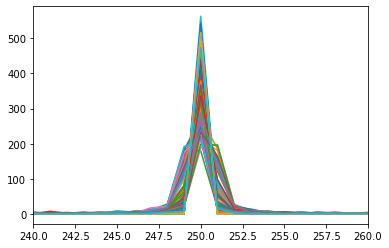

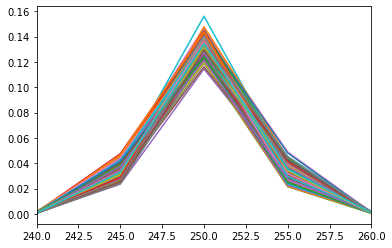

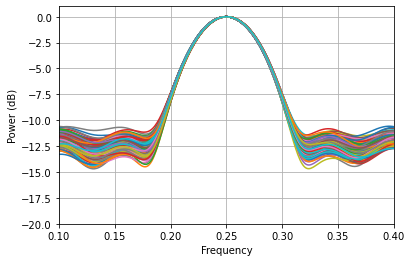

In [33]:
################################
###Calculo del periodograma con 3 dB
################################

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_0,axis=0)))**2

#Metodo de Welch
f_welch,Pxx_den = sig.welch(x_0,fs=fs,nperseg=N/5,axis=0)

#%%Grafico las salidas
plt.figure(figura)
figura+=1
##Restrinjo las salidas para ver mas claramente los efectos del calculo
#plt.semilogy(f,Pp)
plt.plot(f,Pp)
plt.xlim(240,260)

plt.figure(figura)
figura+=1
#plt.semilogy(f_welch,Pxx_den)
plt.plot(f_welch,Pxx_den)
plt.xlim(240,260)
############
#Ya que spectrum no tiene ninguna implementacion para axis armo las comparaciones con 1 muestra a la vez
############
plt.figure(figura)
figura+=1
for i in range(len(fr)):
    p_BT = spectrum.pcorrelogram(x_0[:,i], lag=15)
    p_BT(); 
    p_BT.plot(label='Correlogram(15)', norm=norm, sides=sides)
plt.xlim(0.1,0.4)
plt.ylim(-20,1)

In [34]:
################################
###Calculo del pico con 3dB
################################

indices_Pp_0=Pp.argmax(axis=0)

indices_Pxx_den_0=Pxx_den.argmax(axis=0)

################################
### Calculo el error
### Con los dos metodos para 3dB
################################

error_Pp_0=f[indices_Pp_0]-(omega_1*fs/(2*np.pi))

error_Pxx_0=f_welch[indices_Pxx_den_0]-(omega_1*fs/(2*np.pi))

media_Pp_0=np.mean(error_Pp_0)

media_Pxx_0=np.mean(error_Pxx_0)

################################
### Calculo la varianza
### Con los dos metodos para 3dB
################################

var_error_Pp_0=np.var(error_Pp_0)

var_error_Pxx_0=np.var(error_Pxx_0)

C:\Users\Ema\anaconda3\lib\site-packages\spectrum\tools.py:254: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
C:\Users\Ema\anaconda3\lib\site-packages\spectrum\tools.py:254: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
C:\Users\Ema\anaconda3\lib\site-packages\spectrum\tools.py:254: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
C:\Users\Ema\anaconda3\lib\site-packages\spectrum\tools.py:254: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)


(-20.0, 1.0)

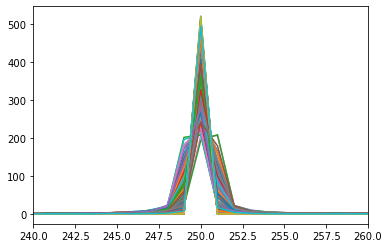

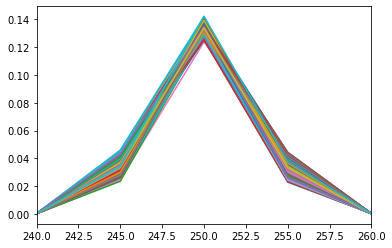

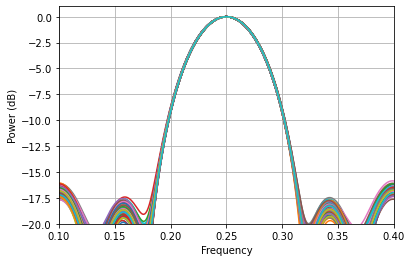

In [35]:
################################
###Calculo del periodograma con 10 dB
################################

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_1,axis=0)))**2

#Metodo de Welch
f_welch,Pxx_den = sig.welch(x_1,fs=fs,nperseg=N/5,axis=0)

##Grafico las salidas
plt.figure(figura)
figura+=1
##En este grafico restrinjo el eje x ya que no queremos la otra mitad
#plt.semilogy(f,Pp)
plt.plot(f,Pp)
plt.xlim(240,260)


plt.figure(figura)
figura+=1
#plt.semilogy(f_welch,Pxx_den)
plt.plot(f_welch,Pxx_den)
plt.xlim(240,260)

############
#Ya que spectrum no tiene ninguna implementacion para axis armo las comparaciones con 1 muestra a la vez
############
plt.figure(figura)
figura+=1
for i in range(len(fr)):
    p_BT = spectrum.pcorrelogram(x_1[:,i], lag=15)
    p_BT(); 
    p_BT.plot(label='Correlogram(15)', norm=norm, sides=sides)
plt.xlim(0.1,0.4)
plt.ylim(-20,1)

In [36]:
################################
###Calculo del pico con 10dB
################################

indices_Pp_1=Pp.argmax(axis=0)

indices_Pxx_den_1=Pxx_den.argmax(axis=0)

################################
### Calculo el error
### Con los dos metodos para 10dB
################################
#Periodograma
error_Pp_1=f[indices_Pp_1]-(omega_1*fs/(2*np.pi))
#Welch
error_Pxx_1=f_welch[indices_Pxx_den_1]-(omega_1*fs/(2*np.pi))

media_Pp_1=np.mean(error_Pp_1)

media_Pxx_1=np.mean(error_Pxx_1)

################################
### Calculo la varianza
### Con los dos metodos para 10dB
################################

var_error_Pp_1=np.var(error_Pp_1)

var_error_Pxx_1=np.var(error_Pxx_1)

Conclusiones hasta aca:<br>
Los graficos semi log no nos permiten distinguir cual de los dos experimientos es el mas ruidoso pero son escalas mas razonables.<br>
El metodo de welch es mucho mejor al momento de definir en que frecuencia esta nuestra señal comparado con nuestro periodograma normal que dispersa mas la energia.<br>
Como adicional le tiro un zero padding a las señales solo para revisar si hace algo divertido.<br>
Esto ultimo no seria una conclusion xD

(-20.0, 1.0)

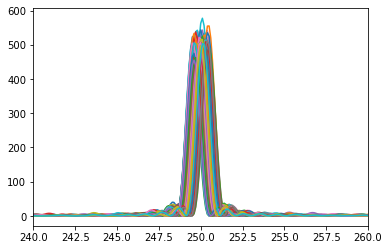

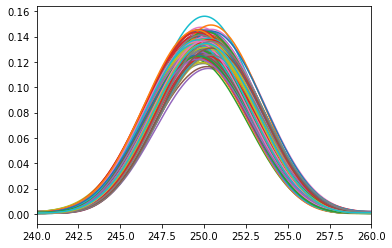

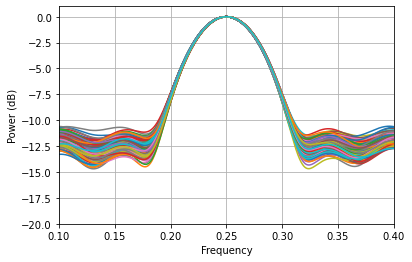

In [37]:
################################
###Calculo del periodograma con 3 dB y zero padding
################################
#Creo un nuevo vector f para los calculos
f_padded=np.arange(0,fs,fs/(10*N))

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_0,n=10*N,axis=0)))**2


#Metodo de Welch
f_welch,Pxx_den = sig.welch(x_0,fs=fs,nperseg=N/5,nfft=10*N,axis=0)

###Grafico las salidas
plt.figure(figura)
figura+=1
##Restrinjo las salidas para ver mas claramente los efectos del calculo
#plt.semilogy(f,Pp)

plt.plot(f_padded,Pp)
plt.xlim(240,260)

plt.figure(figura)
figura+=1
#plt.semilogy(f_welch,Pxx_den)
plt.plot(f_welch,Pxx_den)
plt.xlim(240,260)
############
#Ya que spectrum no tiene ninguna implementacion para axis armo las comparaciones con 1 muestra a la vez
############
plt.figure(figura)
figura+=1
for i in range(len(fr)):
    p_BT = spectrum.pcorrelogram(x_0[:,i], lag=15,NFFT=10*N)
    p_BT(); 
    p_BT.plot(label='Correlogram(15)', norm=norm, sides=sides)
plt.xlim(0.1,0.4)
plt.ylim(-20,1)

C:\Users\Ema\anaconda3\lib\site-packages\spectrum\tools.py:254: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
C:\Users\Ema\anaconda3\lib\site-packages\spectrum\tools.py:254: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
C:\Users\Ema\anaconda3\lib\site-packages\spectrum\tools.py:254: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
C:\Users\Ema\anaconda3\lib\site-packages\spectrum\tools.py:254: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)


(-20.0, 1.0)

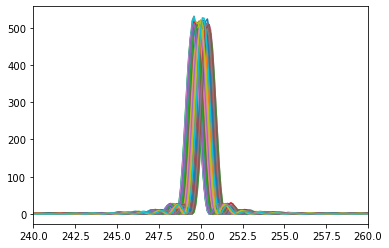

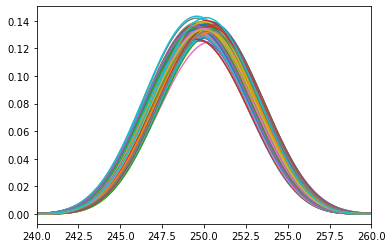

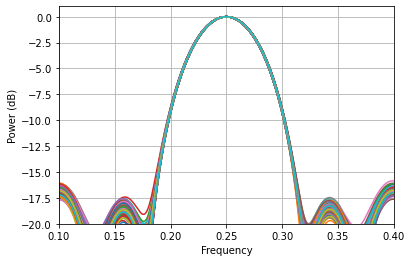

In [38]:
################################
###Calculo del pico con 3dB y zero padding
################################

indices_Pp_0=Pp.argmax(axis=0)

indices_Pxx_den_0=Pxx_den.argmax(axis=0)

################################
###Calculo del periodograma con 10 dB y zero padding
################################

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_1,n=10*N,axis=0)))**2

#Metodo de Welch
f_welch,Pxx_den = sig.welch(x_1,fs=fs,nperseg=N/5,nfft=10*N,axis=0)

##Grafico las salidas
plt.figure(figura)
figura+=1
##En este grafico restrinjo el eje x ya que no queremos la otra mitad
#plt.semilogy(f,Pp)
plt.plot(f_padded,Pp)
plt.xlim(240,260)


plt.figure(figura)
figura+=1
#plt.semilogy(f_welch,Pxx_den)
plt.plot(f_welch,Pxx_den)
plt.xlim(240,260)

############
#Ya que spectrum no tiene ninguna implementacion para axis armo las comparaciones con 1 muestra a la vez
############
plt.figure(figura)
figura+=1
for i in range(len(fr)):
    p_BT = spectrum.pcorrelogram(x_1[:,i], lag=15,NFFT=10*N)
    p_BT(); 
    p_BT.plot(label='Correlogram(15)', norm=norm, sides=sides)
plt.xlim(0.1,0.4)
plt.ylim(-20,1)


Conclusion 2 jejeje<br>
El zero padding suavizo mi salida ya que ahora tiene mas muestras(mejor resolucion) al momento de ventanear que no aportan potencia ya que contienen zeros.<br>
Y me hace mas bonitos los graficos :P<br>

(240.0, 260.0)

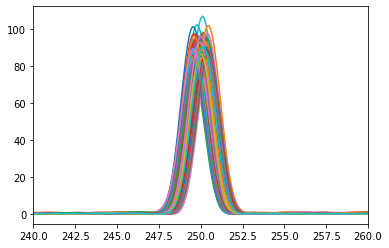

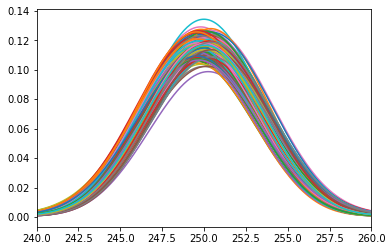

In [39]:
################################
###Calculo del periodograma con 3 dB, zero padding y otra ventana
################################
#Creo un nuevo vector f para los calculos
f_padded=np.arange(0,fs,fs/(10*N))

#Creo un nuevo x_0 ahora ventaneado con algo distinto de la rectangular implicita
#Blackman
Blackman=np.blackman(N)
x_0_Blackman=x_0*Blackman.reshape(N,1)

#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_0_Blackman,n=10*N,axis=0)))**2


#Metodo de Welch
f_welch,Pxx_den = sig.welch(x_0,fs=fs,nperseg=N/5,window='blackman',nfft=10*N,axis=0)

###Grafico las salidas
plt.figure(figura)
figura+=1
##Restrinjo las salidas para ver mas claramente los efectos del calculo
#plt.semilogy(f,Pp)

plt.plot(f_padded,Pp)
plt.xlim(240,260)

plt.figure(figura)
figura+=1
#plt.semilogy(f_welch,Pxx_den)
plt.plot(f_welch,Pxx_den)
plt.xlim(240,260)

C:\Users\Ema\anaconda3\lib\site-packages\spectrum\tools.py:254: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
C:\Users\Ema\anaconda3\lib\site-packages\spectrum\tools.py:254: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
C:\Users\Ema\anaconda3\lib\site-packages\spectrum\tools.py:254: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
C:\Users\Ema\anaconda3\lib\site-packages\spectrum\tools.py:254: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)


(-30.0, 1.0)

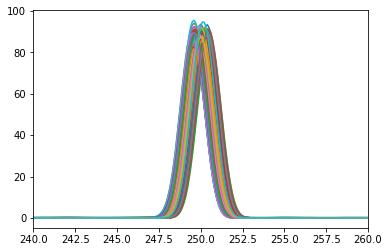

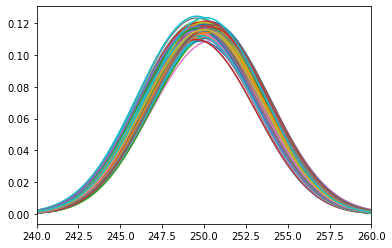

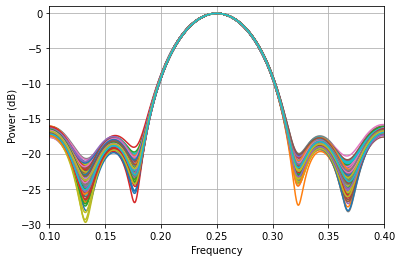

In [40]:
################################
###Calculo del periodograma con 10 dB, zero padding y otra ventana
################################

x_1_Blackman=x_1*Blackman.reshape(N,1)
#calculo el periodograma normal
Pp=(1/N)*np.abs((fft(x_1_Blackman,n=10*N,axis=0)))**2

#Metodo de Welch
f_welch,Pxx_den = sig.welch(x_1,fs=fs,nperseg=N/5,window='blackman',nfft=10*N,axis=0)

##Grafico las salidas
plt.figure(figura)
figura+=1
##En este grafico restrinjo el eje x ya que no queremos la otra mitad
#plt.semilogy(f,Pp)
plt.plot(f_padded,Pp)
plt.xlim(240,260)


plt.figure(figura)
figura+=1
#plt.semilogy(f_welch,Pxx_den)
plt.plot(f_welch,Pxx_den)
plt.xlim(240,260)

############
#Ya que spectrum no tiene ninguna implementacion para axis armo las comparaciones con 1 muestra a la vez
############
plt.figure(figura)
figura+=1
for i in range(len(fr)):
    ##PAdeo con hasta 10 veces N de ceros
    x_1_pad=np.resize(x_1,(10*N,200))
    x_1_pad[:,i]=x_1_pad[:,i]*np.blackman(10*N)
    p_BT = spectrum.pcorrelogram(x_1[:,i], lag=15,NFFT=10*N)
    p_BT(); 
    p_BT.plot(label='Correlogram(15)', norm=norm, sides=sides)
plt.xlim(0.1,0.4)
plt.ylim(-30,1)




Conclusion 3:<br>
Es evidente que elegir otra ventana esta cambiando mi periodo grama en este caso en el ancho de la campana pero a su vez cambia mis valores pico. <br>
Con lo cual intuyo que esta manteniendo una suerte de relacion de area.<br>

In [41]:
#######################
#%%Calculo de sesgo y varianza
#######################

#Sesgo: s = mu - a0

s_Periodo_3dB = media_Pp_0
s_Welch_3dB = media_Pxx_0

s_Periodo_10dB = media_Pp_1
s_Welch_10dB = media_Pxx_1

#Varianza: Var(x)=E[(X-mu)**2]
#Se calculo previamente
# print("Varianza Periodograma 3dB =",var_error_Pp_0 )
# print("Varianza Periodograma 10dB =",var_error_Pp_1 )
# print("Varianza Welch 3dB =",var_error_Pxx_0 )
# print("Varianza Welch 10dB =",var_error_Pxx_1 )
# Muestro los datos

data = [[s_Periodo_3dB, var_error_Pp_0],
        [s_Periodo_10dB, var_error_Pp_1],
        [s_Welch_3dB, var_error_Pxx_0],
        [s_Welch_10dB, var_error_Pxx_1]]

df = DataFrame(data,columns=['$s_a$', '$v_a$'],
                index=[  
                        'Periodograma 3dB',
                        'Periodograma 10dB',
                        'Welch 3dB',
                        'Welch 10dB'
                      ])
HTML(df.to_html())



,$s_a$,$v_a$
Periodograma 3dB,0.026933,0.074928
Periodograma 10dB,0.036933,0.074267
Welch 3dB,0.026933,0.074857
Welch 10dB,0.026933,0.074857
